<a href="https://colab.research.google.com/github/raphaellins/ai-playground/blob/master/perceptron_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The basic modeling



In [4]:
%tensorflow_version 2.x

In [24]:
import tensorflow
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
temperature_df = pd.read_csv('/content/drive/My Drive/machine_learning_practice/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [ ]:
temperature_df.describe()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


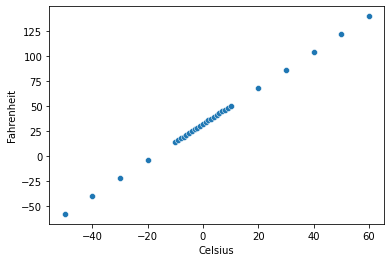

In [15]:
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']);

In [19]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [16]:
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(units=1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=500)

In [21]:
epochs_hist.history.keys()

dict_keys(['loss'])

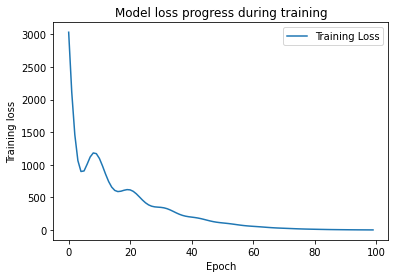

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training Loss'])

In [27]:
model.get_weights()

[array([[1.7989022]], dtype=float32), array([30.796257], dtype=float32)]

In [28]:
temp_c = 0
temp_f = model.predict([temp_c])
temp_f

array([[30.796257]], dtype=float32)

In [29]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

32.0

# New learning with Sales Data 

In [30]:
sales_df = pd.read_csv('/content/drive/My Drive/machine_learning_practice/SalesData.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


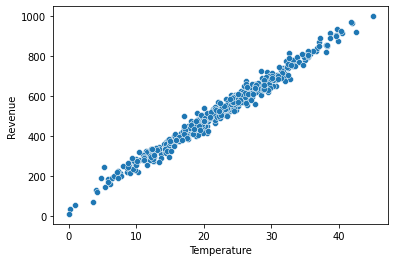

In [33]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue']);

In [34]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [39]:
model = tensorflow.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

In [ ]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(0.1), loss = "mean_squared_error")
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

In [41]:
epochs_hist.history.keys()

dict_keys(['loss'])

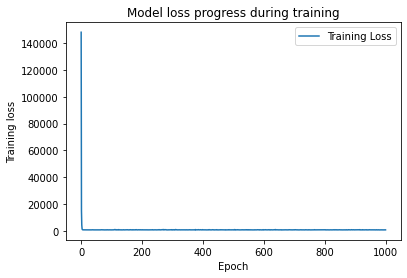

In [42]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training Loss'])

In [43]:
temp = 5
revenue = model.predict([temp])
